In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [118]:
dataset = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022clean.csv")

In [119]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [120]:
print(data)

      Latitude   Longitude  Kedalaman (km)  Magnitude
0      -5.3000  113.493398              12        0.0
1      -7.9900  111.200000              10        3.2
2       0.4000  118.729166              12        0.0
3      -9.4400  113.060000              10        4.7
4      -9.7300  112.870000              10        4.9
...        ...         ...             ...        ...
2153   -7.8601  110.529800              13        1.3
2154   -8.8718  112.456500              44        3.2
2155   -9.0316  112.148100              10        3.2
2156  -10.2996  113.280300              10        3.6
2157  -10.2996  113.280300              10        3.6

[2158 rows x 4 columns]


In [121]:
train_dates = pd.to_datetime(dataset['Datetime'])

In [122]:
data = dataset[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']]
values = data.values
values = values.astype('float64')

In [123]:
values.dtype

dtype('float64')

In [124]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [125]:
data_for_training = data[['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].astype(float)

In [126]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [127]:
train_X = []
train_y = []

In [128]:
n_future = 1
n_past = 30

for i in range(n_past, len(data_for_training_scaled) - n_future +1):
    train_X.append(data_for_training_scaled[i - n_past:i, 0:data_for_training.shape[1]])
    train_y.append(data_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [129]:
train_X, train_y = np.array(train_X), np.array(train_y)

In [130]:
X_training, X_test, y_training, y_test  = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [131]:
print(X_training.shape, y_training.shape, X_test.shape, y_test.shape)

(1702, 30, 4) (1702, 1) (426, 30, 4) (426, 1)


In [132]:
print('train_X shape =={}.'.format(train_X.shape))
print('train_y shape =={}.'.format(train_y.shape))

train_X shape ==(2128, 30, 4).
train_y shape ==(2128, 1).


In [133]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# Third LSTM layer
model.add(LSTM(units=32,activation='relu', return_sequences=True))
# Fourth LSTM layer
model.add(LSTM(units=16, activation='relu'))
# The output layer
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            17664     
                                                                 
 lstm_10 (LSTM)              (None, 30, 32)            12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________________


In [134]:
optimizer=Adam(learning_rate=0.001)

In [135]:
model.compile(optimizer=optimizer, loss='mse')

In [136]:
history = model.fit(X_training, y_training, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/100



Epoch 1: val_loss improved from inf to 0.89009, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 4s - loss: 1.0269 - val_loss: 0.8901 - 4s/epoch - 165ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.89009 to 0.88486, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 1.0230 - val_loss: 0.8849 - 882ms/epoch - 37ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.88486 to 0.88166, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 1.0206 - val_loss: 0.8817 - 918ms/epoch - 38ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.88166
24/24 - 1s - loss: 1.0195 - val_loss: 0.8858 - 826ms/epoch - 34ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.88166 to 0.87890, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_4.h5
24/24 - 1s - loss: 1.0215 - val_loss: 0.8789 - 851ms/epoch - 35ms/step
Epoch 6/100

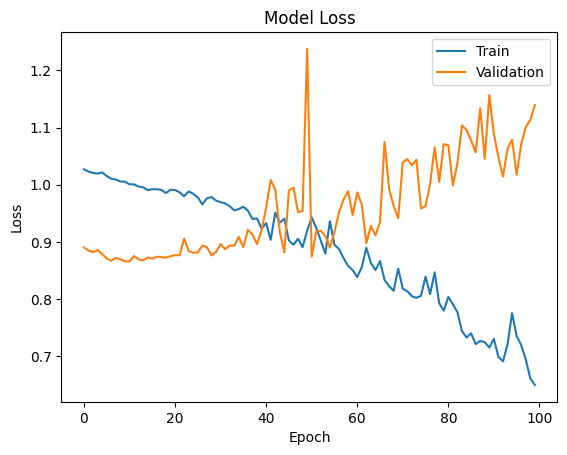

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [138]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_4.h5")
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

14/14 [==============================] - 1s 9ms/step - loss: 0.8657
Loss: 0.865688145160675


In [139]:
n_past = 1
n_days_for_prediction=366
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-28 00:00:00'), Timestamp('20

In [140]:
prediction = model.predict(X_training[-n_days_for_prediction:])

12/12 [==============================] - 1s 8ms/step


In [141]:
print(prediction)

[[-0.30080986]
 [ 0.11312509]
 [ 0.02987406]
 [-0.00798608]
 [-0.08904223]
 [ 0.04710345]
 [-0.27003106]
 [ 0.09870873]
 [ 0.16678213]
 [-0.25249413]
 [ 0.07184   ]
 [-0.09342113]
 [ 0.03189936]
 [-0.07975759]
 [ 0.02812695]
 [ 0.17725356]
 [-0.22563149]
 [ 0.14675255]
 [-0.2453755 ]
 [ 0.07621621]
 [ 0.03266015]
 [ 0.1299888 ]
 [-0.00689646]
 [ 0.17577891]
 [ 0.07969385]
 [ 0.05189647]
 [ 0.07437466]
 [-0.2307064 ]
 [-0.30917424]
 [-0.16762723]
 [-0.15243089]
 [-0.10971093]
 [-0.24573778]
 [ 0.09191146]
 [ 0.05405689]
 [ 0.07163508]
 [ 0.0576455 ]
 [-0.1645741 ]
 [ 0.02789758]
 [-0.2844992 ]
 [ 0.02498129]
 [ 0.06182553]
 [ 0.07599488]
 [-0.00675914]
 [ 0.17629884]
 [-0.19015236]
 [ 0.23955409]
 [-0.01436069]
 [-0.21179189]
 [-0.17388274]
 [ 0.11828877]
 [-0.00581005]
 [ 0.1176952 ]
 [-0.09741448]
 [-0.24437179]
 [ 0.05789876]
 [ 0.06679976]
 [ 0.05110215]
 [-0.10262604]
 [ 0.09466965]
 [-0.20868844]
 [-0.20820485]
 [-0.3780015 ]
 [ 0.05768459]
 [-0.22531784]
 [ 0.0200156 ]
 [ 0.16427

In [142]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]
y_pred_future = np.abs(y_pred_future)

C:\Users\wajit\AppData\Local\Temp\ipykernel_33644\1059575106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Datetime']=pd.to_datetime(original['Datetime'])


<Axes: xlabel='Datetime', ylabel='Magnitude'>

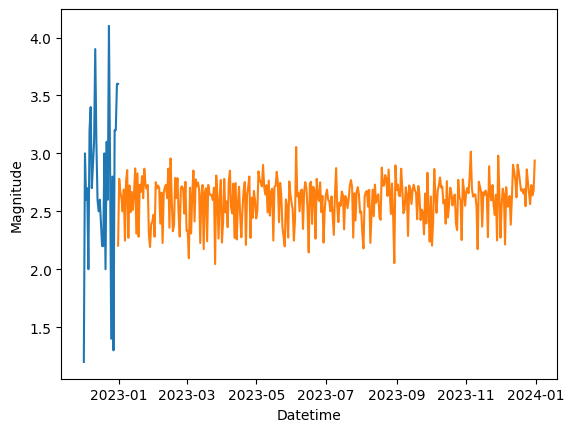

In [143]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Datetime': np.array(forecast_dates), 'Magnitude': y_pred_future})
df_forecast['Datetime'] = pd.to_datetime(df_forecast['Datetime'])


original = dataset[['Datetime', 'Magnitude']]
original['Datetime']=pd.to_datetime(original['Datetime'])
original = original.loc[original['Datetime'] >= '2022-12-1']

sns.lineplot(x=original['Datetime'], y=original['Magnitude'])
sns.lineplot(x=df_forecast['Datetime'], y=df_forecast['Magnitude'])